#                Algorithms for Outlier detection

Values that lie far away from the bulk of the data are called Outliers. What is called an outlier is an arbitary decision.
Usually Analysts use rule of thumb such as "anything over three standard deviations away from the mean is an outlier."
We might have outlier either because there is an error either in data entry, measurement errors, experimental erros, Data procesing errors, sampling errors or it just the data is a distant one


There are two types of Analysis we follow to find outliers
i) Univariate analysis: It is a data point that consists of an outlier value on one variable. We can use Z scores. For continuous variables, univariate outliers can be considered standardized cases that are outside the absolute value of 3.29. 
ii) Multivariate Outlier: It is combination of unusual scores on at least two variables. Multivariate outliers can be identified with the use of Mahalanobis distance.


# 1 Univariate Analysis

# 1.1 Box plot

In box plot the population will be grouped and displayed as boxes. If there is an outlier it will be plotted as a point outside the box

<img src='https://www.dropbox.com/s/ir2d4qdcetwlplr/Boxplot_image.png?raw=1' width=300px/>

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
X1 = boston.data
columns = boston.feature_names
#converting the data into dataframe
Boston = pd.DataFrame(boston.data, columns = columns)
Boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [3]:
X = Boston.iloc[:,:-1]
y = Boston.iloc[:,-1]


C:\Users\Rukhsaar\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


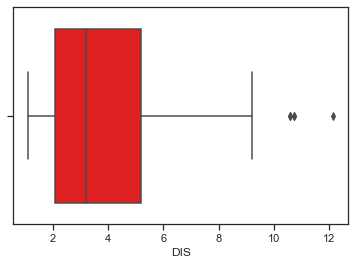

In [4]:
#univariate outliers
# lets plot 
import seaborn as sns
sns.set(style = "ticks")
boston_columns = list(Boston)
sns.boxplot(x = Boston["DIS"],color = 'red')
plt.show()


We can clearly see that the points between 10 to 12 are outliers. We can also use box plot to do multivariate analysis if you have one column as categorical and other as coninuous variable

# 1.2 Zscore
Z score describes data using Standard deviation and Mean. While finding the Z score we rescale and center the data and look for data points whihc are too far from zero. In most cases we set the threshold of +3 or -3. If the data is greater than +3 or -3 then we identify that point as outlier.  
Z score = (Observation — Mean)/Standard Deviation                          
z = (X — μ) / σ                                                           
Z score is good if we are dealing with parametric distribution in a low dimensional feature space. For non parametric problems Dbscan and Isolation forests can be good solution


In [5]:
from scipy import stats # 
#lets create a dataset
Dataset = [10,12, 15,30,25,12,13,13,8,12,6,13,10,10,12,12,14,20,20,10,15,14,13,15,12,-111]
z = np.abs(stats.zscore(Dataset))
z

array([0.03921826, 0.12079223, 0.24315319, 0.85495797, 0.65102304,
       0.12079223, 0.16157921, 0.16157921, 0.04235572, 0.12079223,
       0.12392969, 0.16157921, 0.03921826, 0.03921826, 0.12079223,
       0.12079223, 0.2023662 , 0.44708811, 0.44708811, 0.03921826,
       0.24315319, 0.2023662 , 0.16157921, 0.24315319, 0.12079223,
       4.89600704])

In [6]:
# set the threshold to 3
print(np.where (z> 3) or (z<-3)) 

(array([25], dtype=int64),)


In [7]:
#lets print point 25 z score
print(z[25]) # the result shows that the point 25th is an outlier. 

4.8960070384195795


In [8]:
#lets use z score for boston data set
zscore = np.abs(stats.zscore(Boston))
print("zscore is\n", zscore) 
threshold =3
print("\nz score where z is greater than 3 \n\n",np.where(zscore>3)) 

zscore is
 [[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]

z score where z is greater than 3 

 (array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
  

In [9]:
#The first array in the above result shows the list of rows and 
#the second array shows its respective columns
#lets print one result
print(zscore[55][1])

3.375038763517309


# 1.3 IQR Score

It is statistical dispersion, being equal to the difference between 1st and 3rd quartile.                                                        
IQR = Q3 - Q1.                                                            
Basically, the box plot uses the IQR method to display data. But lets use the mathematical formula to retrive the outlier data. 

In [10]:
#We are using same boston dataset
#lets fine IQR
Q1 = Boston.quantile(0.25)
Q3 = Boston.quantile(0.75)
IQR = Q3 - Q1
IQR

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64

In [11]:
#The code below will find the values that lies below Q1 and above Q3
# if the value is false it means they are inside the quartile and if it is true
#it means they are outliers
print((Boston < (Q1 - 1.5 * IQR)) |(Boston > (Q3 + 1.5 * IQR)))

      CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO      B  LSTAT  
0      False  False  False  
1      False  Fal

# 2. Mulitvariate Analysis

# 2.1 Scatter Plot

Scatter plot shows the collection of points of 2 variables. The points that are scattered outside the population or are not scattered together are outliers

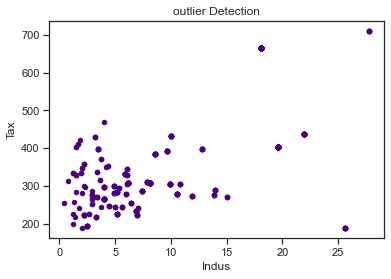

In [12]:
#outlier detection using scater plot 
Boston.plot(kind = 'scatter', x = "INDUS",
           y = "TAX",  color = 'indigo')
plt.title("outlier Detection")
plt.ylabel("Tax")
plt.xlabel("Indus")
plt.show()

# 2.2 Mahalanobis Distance

It is a distance between a point and a distribution and not between two distinct points. It transforms the columns into uncorrelated variables. Then it scales the columns to make their variance equal to 1. Finally, it calculates the Euclidean distance

To know how this works please refer to this link - https://www.machinelearningplus.com/statistics/mahalanobis-distance/

In [13]:
filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv'
df = pd.read_csv(filepath).iloc[:, [0,4,6]]
df.head()

,carat,depth,price
0,0.23,61.5,326
1,0.21,59.8,326
2,0.23,56.9,327
3,0.29,62.4,334
4,0.31,63.3,335


In [14]:
import scipy as sp
#Function to calculate Mahalanobis

def mahalanobis(x = None, data = None, cov = None):  
   #Compute the Mahalanobis Distance between each row of x and the data  
    #x    : vector or matrix of data with, say, p columns.
    #data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    #cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

df_x = df[['carat', 'depth', 'price']].head(500)
df_x['mahala'] = mahalanobis(x=df_x, data=df[['carat', 'depth', 'price']])
df_x.head()

# Critical values for two degrees of freedom
from scipy.stats import chi2
chi2.ppf((1-0.01), df=2)

# Compute the P-Values
df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
df_x.loc[df_x.p_value < 0.01].head(10)


,carat,depth,price,mahala,p_value
2,0.23,56.9,327,12.715021,0.001734
91,0.86,55.1,2757,23.909643,0.000006
97,0.96,66.3,2759,11.781773,0.002765
172,1.17,60.2,2774,9.279459,0.009660
204,0.98,67.9,2777,20.086616,0.000043
221,0.70,57.2,2782,10.405659,0.005501
227,0.84,55.1,2782,23.548379,0.000008
255,1.05,65.8,2789,11.237146,0.003630
284,1.00,58.2,2795,10.349019,0.005659
298,1.01,67.4,2797,17.716144,0.000142


In [15]:
#n degree of freedom and critical value at 0.01 significance level and 2 degrees of freedom
# Critical values for two degrees of freedom
from scipy.stats import chi2
chi2.ppf((1-0.01), df=2)
# Compute the P-Values
df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
df_x.loc[df_x.p_value < 0.01].head(10)

,carat,depth,price,mahala,p_value
2,0.23,56.9,327,12.715021,0.001734
91,0.86,55.1,2757,23.909643,0.000006
97,0.96,66.3,2759,11.781773,0.002765
172,1.17,60.2,2774,9.279459,0.009660
204,0.98,67.9,2777,20.086616,0.000043
221,0.70,57.2,2782,10.405659,0.005501
227,0.84,55.1,2782,23.548379,0.000008
255,1.05,65.8,2789,11.237146,0.003630
284,1.00,58.2,2795,10.349019,0.005659
298,1.01,67.4,2797,17.716144,0.000142


# 2.3 DBSCAN

It is a density based clustering approach and not an outlier detection method per se. But we can use DBSCAN as an outlier detection algorithm because points that do not belong to any cluster get their own clas -1. This algorithm has 2 parameters (epsilon: length scale and min_samples: min number of samples required for a point to be a core piont). Finding good epsilon is critical

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


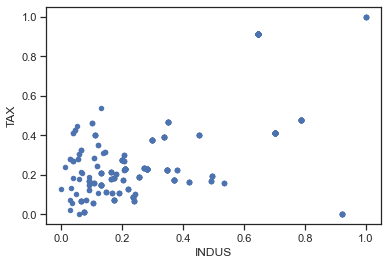

In [16]:
# Lets try DBSCAN on boston dataset. INDUS and TAX are on 2 different scales
# We will use MinMaxScaler to bring them to one scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Indus_Tax = Boston[["INDUS","TAX"]]
Indus_Tax = scaler.fit_transform(Indus_Tax)
Indus_Tax = pd.DataFrame(Indus_Tax, columns = ["INDUS","TAX"])
Indus_Tax.plot.scatter(x = "INDUS", y = "TAX")


In [17]:
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(eps = 0.3, metric = "euclidean",min_samples = 7, 
                           n_jobs = -1)
Clusters = outlier_detection.fit_predict(Indus_Tax)
Clusters
# Try chaning min samples and eps. Usually if the distance is more we can take minimum
#samples as 3 but as they are not far from each other we are taking it as 7

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

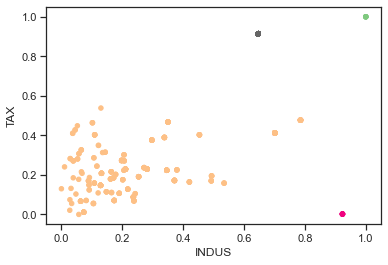

In [18]:
#highlight those points
# Let's highlight the points that are outliers
from matplotlib import cm
cmap = cm.get_cmap("Accent")
Indus_Tax.plot.scatter(x = "INDUS", y = "TAX",
                      c = Clusters, cmap = cmap, colorbar = False)

# 2.4 Isolation Forest

The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

In [19]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
IsoForest = IsolationForest(behaviour = 'new',max_samples = 100, random_state = 1, 
                            contamination = 0.05)

X1 = Indus_Tax

#X1 = X1.reshape(506,1)
X_train, X_test = train_test_split(X1, test_size=0.3, random_state=0)


In [20]:
IsoForest.fit(X_train)
y_train = IsoForest.predict(X_train)
y_test = IsoForest.predict(X_test)
print(y_train)

C:\Users\Rukhsaar\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


[ 1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

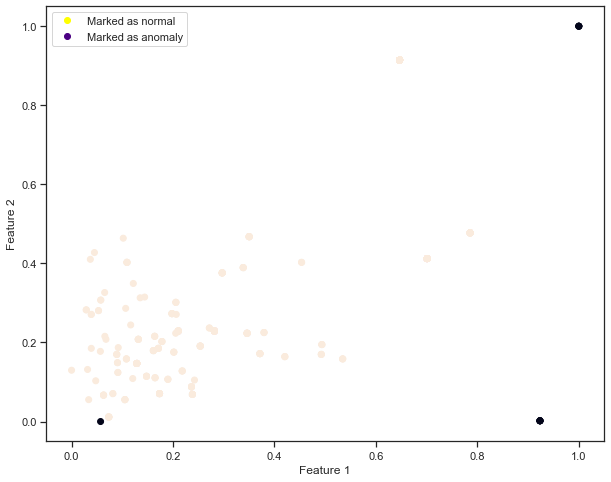

In [21]:
#Now we will plot and visualize how good our algorithm works for training data
#y_train(the state) will mark the colors accordingly
from matplotlib.lines import Line2D

plt.figure(figsize=(10,8))
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=y_train)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

 
#This is to set the legend appropriately
legend_elements = [Line2D([], [], marker='o', color='yellow', label='Marked as normal',linestyle='None'),
                   Line2D([], [], marker='o', color='indigo', label='Marked as anomaly', linestyle='None')]
plt.legend(handles=legend_elements)

# 3. PyOD outliers detection algorithms


PyOD is a scalable python toolkit for detecting outliers in multivariate data. It provides access to around 20 outlier detection algorithms under a single well doucmented API. In this we will discuss only two algorithms ABOD and KNN. To learn more refer - analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/ 

In [22]:
#!pip install pyod

# Angle- based Outlier Detection (ABOD):
It considers the relationship between each point and its neighbor(s) without considering the relationship amongst them. The variance of its weighted cosine scores to all neighbors could be viewed as the outlying score.
It is useful for hight-dimensional data, as the angle is a more robus measure than the distance in high-dimensional data.


# K - Nearest Neighbors Detector
For any data point, the distance to its kth nearest neighbor could be viewed as the outlying score
PyOD supports three kNN detectors:
Largest: Uses the distance of the kth neighbor as the outlier score
Mean: Uses the average of all k neighbors as the outlier score
Median: Uses the median of the distance to k neighbors as the outlier score

Text(0, 0.5, 'F2')

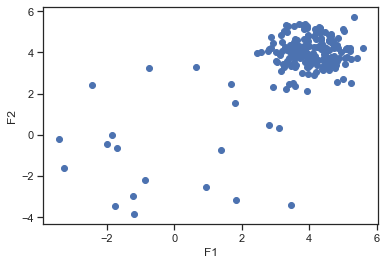

In [24]:
#generate random data with two features
from scipy import stats
from pyod.utils.data import generate_data, get_outliers_inliers
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
X_train, Y_train = generate_data(n_train=200,train_only=True, n_features=2)

# by default the outlier fraction is 0.1 in generate data function 
outlier_fraction = 0.1

# store outliers and inliers in different numpy arrays
x_outliers, x_inliers = get_outliers_inliers(X_train,Y_train)

n_inliers = len(x_inliers)
n_outliers = len(x_outliers)

#separate the two features and use it to plot the data 
F1 = X_train[:,[0]].reshape(-1,1)
F2 = X_train[:,[1]].reshape(-1,1)

# create a meshgrid 
xx , yy = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))

# scatter plot 
plt.scatter(F1,F2)
plt.xlabel('F1')
plt.ylabel('F2') 

In [25]:

#creating dictionary and adding all models we want to use to detect outlier
classifiers = {
     'Angle-based Outlier Detector (ABOD)'   : ABOD(contamination=0.1),
     'K Nearest Neighbors (KNN)' :  KNN(contamination=0.1)
}

Note: Dont PANIC: The code is a 4 line code. Rest of the part it is just visualization.

No of Errors :  Angle-based Outlier Detector (ABOD) 5
No of Errors :  K Nearest Neighbors (KNN) 0


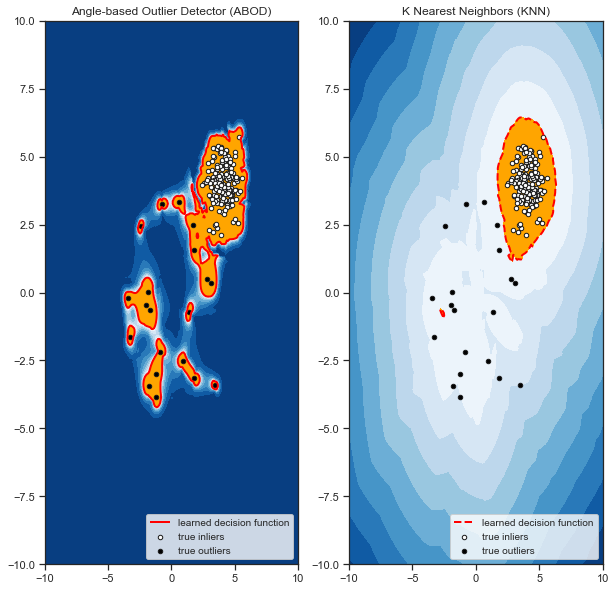

In [26]:
#Fit the data and visualizing how each model is detecting outlier
#note: The codes is just 4 lines. Rest it is visualization
import matplotlib.font_manager
#set the figure size
plt.figure(figsize=(10, 10))

for i, (clf_name,clf) in enumerate(classifiers.items()) :
    # fit the dataset to the model
    clf.fit(X_train)

    # predict raw anomaly score
    scores_pred = clf.decision_function(X_train)*-1

    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X_train)

    # no of errors in prediction
    n_errors = (y_pred != Y_train).sum()
    print('No of Errors : ',clf_name, n_errors)

    # rest of the code is to create the visualization

    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 *outlier_fraction)

    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)

    subplot = plt.subplot(1, 2, i + 1)

    # fill blue colormap from minimum anomaly score to threshold value
    subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), threshold, 10),cmap=plt.cm.Blues_r)

    # draw red contour line where anomaly score is equal to threshold
    a = subplot.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')

    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')

    # scatter plot of inliers with white dots
    b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c='white',s=20, edgecolor='k') 
    # scatter plot of outliers with black dots
    c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c='black',s=20, edgecolor='k')
    subplot.axis('tight')

    subplot.legend(
        [a.collections[0], b, c],
        ['learned decision function', 'true inliers', 'true outliers'],
        prop=matplotlib.font_manager.FontProperties(size=10),
        loc='lower right')

    subplot.set_title(clf_name)
    subplot.set_xlim((-10, 10))
    subplot.set_ylim((-10, 10))
plt.show() 


# References:                                                               
https://www.statisticssolutions.com/univariate-and-multivariate-outliers/                                                  
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba                                         
Shmueli, Galit, et al. Data Mining for Business Analytics: Concepts, Techniques, and Applications in R. John Wiley &amp; Sons, 2018.           
http://colingorrie.github.io/outlier-detection.html                       
https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/                                                                   
https://towardsdatascience.com/density-based-algorithm-for-outlier-detection-8f278d2f7983                                                   
https://donernesto.github.io/blog/outlier-detection-with-dbscan/          
https://blog.easysol.net/using-isolation-forests-anamoly-detection/